### Treinamento do Sarimax com df Geral
Df agrupado por mês

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
import seaborn as sns

In [3]:
df_geral = pd.read_csv('../../df_analise_geral.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df_analise_geral.csv'

In [3]:
# df_geral.head()

,AnoMes,VL Tabela,Vl Bruto,Vl Liquido Final,Clientes,Veiculos,UENs,Setores,Origem,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
0,2020-01,9167549.37,6472828.52,5393691.53,583,19,3,33,6,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1.8,-1.9
1,2020-02,10118763.18,7254142.47,5751548.26,559,19,3,39,6,0.25,0.33,1.1,81.61827,90.61413,86.78925,98.12855,-0.3,0.3
2,2020-03,10169765.90,7311965.44,5894599.74,558,19,3,36,6,0.07,0.12,1.1,80.76074,90.34239,83.15137,93.91747,-4.2,-4.3
3,2020-04,6490599.70,4774743.44,3931148.87,442,18,3,36,6,-0.31,-0.09,-1.7,66.43382,75.01668,69.94442,79.16208,-15.9,-15.7
4,2020-05,6883611.73,4887930.28,3993915.02,371,19,3,31,6,-0.38,-0.48,-1.7,81.57634,86.89620,82.56763,88.37704,18.0,11.6


In [4]:
# df_geral.tail()

,AnoMes,VL Tabela,Vl Bruto,Vl Liquido Final,Clientes,Veiculos,UENs,Setores,Origem,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES","PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR"
49,2024-02,12047523.41,8633683.15,7113309.70,436,18,3,39,6,0.83,0.70,2.5,92.67579,96.46589,101.07075,105.09956,-1.3,1.0
50,2024-03,11750804.42,8290217.09,6848047.67,467,19,3,36,6,0.16,0.05,2.5,103.20858,106.00817,103.42005,105.36516,2.3,0.3
51,2024-04,12583444.11,9243291.24,7667461.96,527,19,3,40,6,0.38,0.43,2.5,98.85368,99.68929,104.66221,106.28871,1.2,0.9
52,2024-05,13388107.38,9696920.43,8076745.81,521,19,3,41,6,0.46,0.51,2.5,NaN,NaN,NaN,NaN,NaN,NaN
53,2024-06,15330139.62,11140389.45,9293021.55,525,19,3,41,6,0.21,0.05,2.5,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_geral.dropna(inplace=True)
df_geral['Data'] = pd.to_datetime(df_geral['AnoMes'])
df_geral.drop(columns=['AnoMes'], inplace=True)
df_geral.set_index('Data', inplace=True)

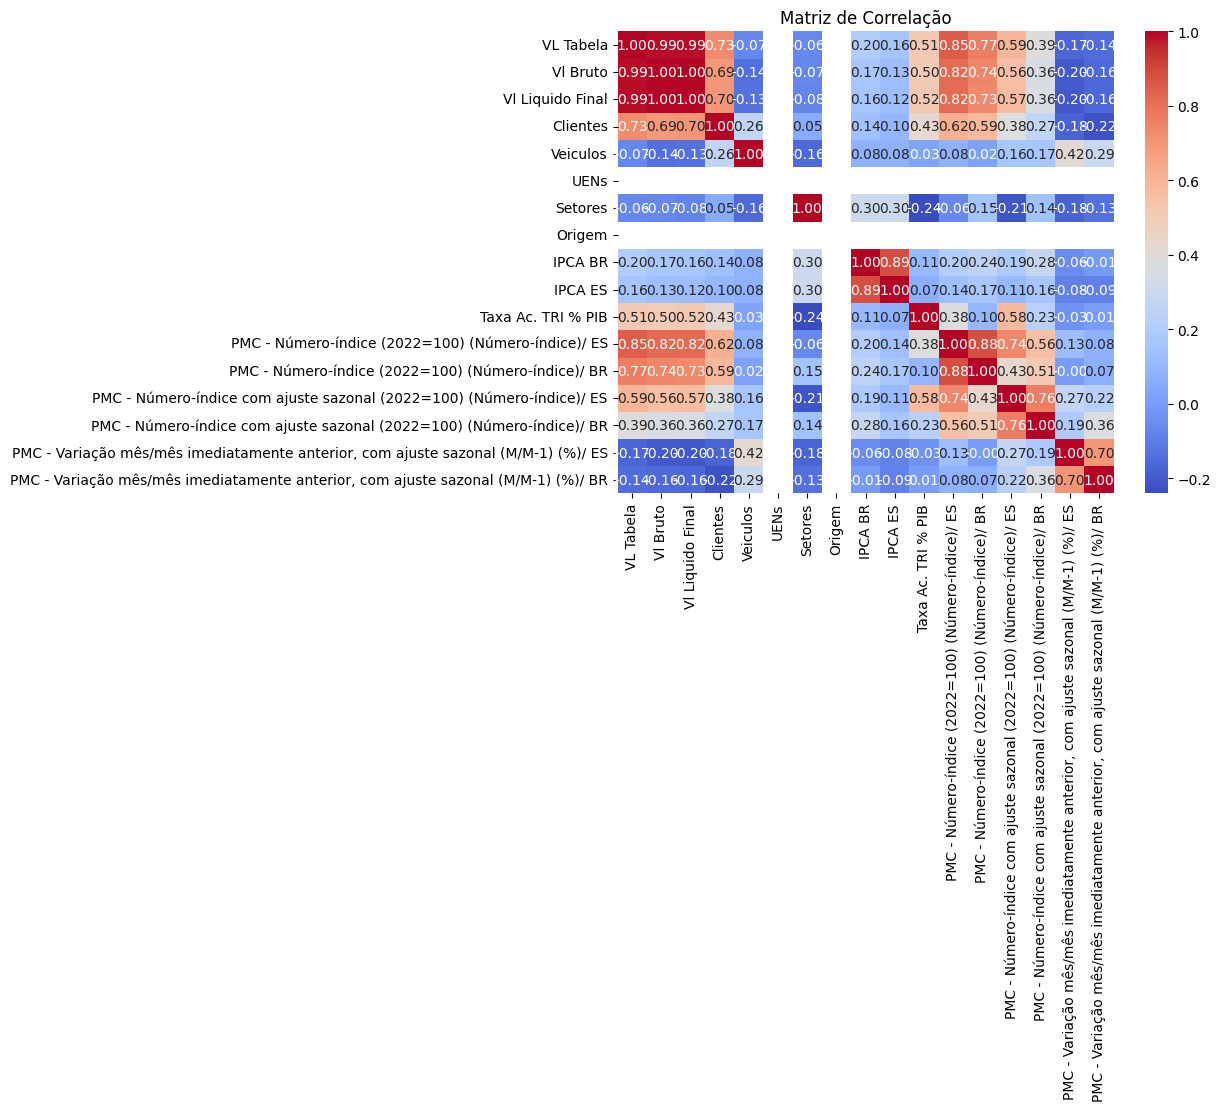

In [9]:
correlation_matrix = df_geral.corr()

# Exibindo a matriz de correlação com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [10]:
df_geral = df_geral.drop(columns=['VL Tabela', 'Vl Bruto', 'Veiculos', 'UENs', 'Setores', 'Origem', 'IPCA BR', 'IPCA ES', 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES', 'PMC - Número-índice (2022=100) (Número-índice)/ BR', 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES', 'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR', 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ BR'])

In [1]:
df_geral.head()

NameError: name 'df_geral' is not defined

In [12]:
df_geral.dtypes

Vl Liquido Final                                      float64
Clientes                                                int64
Taxa Ac. TRI % PIB                                    float64
PMC - Número-índice (2022=100) (Número-índice)/ ES    float64
dtype: object

In [13]:
df_geral.head()

,Vl Liquido Final,Clientes,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES
Data,,,,
2020-01-01,5393691.53,583,1.1,84.25384
2020-02-01,5751548.26,559,1.1,81.61827
2020-03-01,5894599.74,558,1.1,80.76074
2020-04-01,3931148.87,442,-1.7,66.43382
2020-05-01,3993915.02,371,-1.7,81.57634


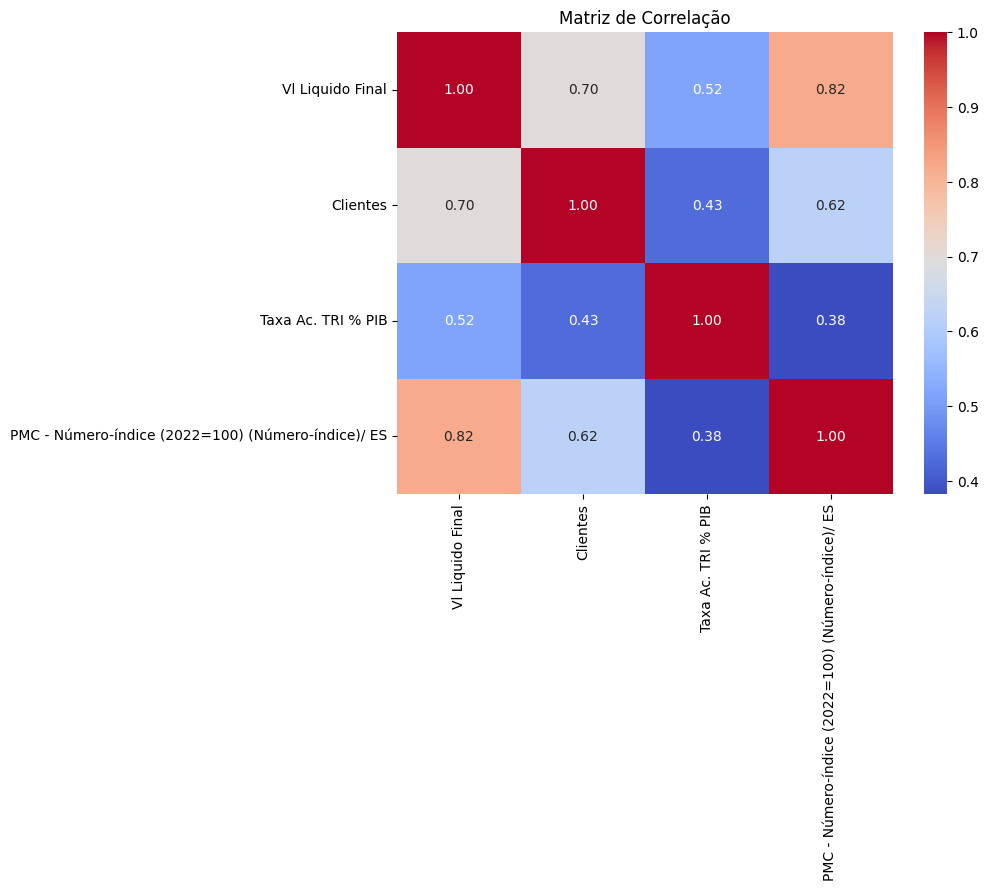

In [14]:
correlation_matrix = df_geral.corr()

# Exibindo a matriz de correlação com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [15]:
df_geral['divisao'] = df_geral['Vl Liquido Final'].shift(1)

In [16]:
df_geral.fillna(5393691.53, inplace=True)

In [17]:
df_geral['dividido'] = df_geral['Vl Liquido Final']/df_geral['divisao']

<Axes: xlabel='Data'>

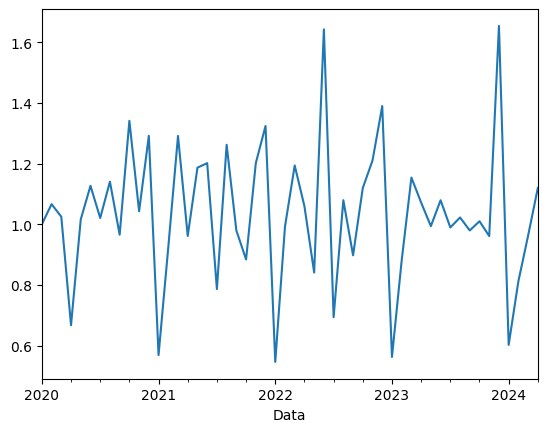

In [18]:
df_geral['dividido'].plot()

In [19]:
df_geral.describe()

,Vl Liquido Final,Clientes,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,divisao,dividido
count,5.200000e+01,52.000000,52.000000,52.000000,5.200000e+01,52.000000
mean,7.624980e+06,575.076923,1.830769,96.646301,7.581254e+06,1.034536
std,2.164689e+06,87.508172,2.655039,10.690715,2.186667e+06,0.234824
min,3.931149e+06,371.000000,-3.300000,66.433820,3.931149e+06,0.545878
25%,6.271723e+06,517.000000,1.100000,90.393008,6.139971e+06,0.951753
50%,7.572099e+06,582.000000,2.700000,97.206125,7.453656e+06,1.021525
75%,8.763730e+06,627.750000,3.700000,100.268970,8.763730e+06,1.162205
max,1.454974e+07,754.000000,4.800000,122.543090,1.454974e+07,1.654318


In [20]:
X = df_geral.drop(columns=['Vl Liquido Final', 'divisao', 'dividido']) 
y = df_geral['dividido']

In [21]:
X.head()

,Clientes,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES
Data,,,
2020-01-01,583,1.1,84.25384
2020-02-01,559,1.1,81.61827
2020-03-01,558,1.1,80.76074
2020-04-01,442,-1.7,66.43382
2020-05-01,371,-1.7,81.57634


In [22]:
y.head()

Data
2020-01-01    1.000000
2020-02-01    1.066347
2020-03-01    1.024872
2020-04-01    0.666907
2020-05-01    1.015966
Name: dividido, dtype: float64

In [23]:
df_geral.dtypes

Vl Liquido Final                                      float64
Clientes                                                int64
Taxa Ac. TRI % PIB                                    float64
PMC - Número-índice (2022=100) (Número-índice)/ ES    float64
divisao                                               float64
dividido                                              float64
dtype: object

In [24]:
# Função para realizar a validação cruzada com janela deslizante
def rolling_window_cv(X, y, order, seasonal_order, steps=1, train_size=0.7):
    n = len(y)
    train_end = int(train_size * n)
    errors = []

    for i in range(train_end, n - steps):
        # Divida os dados até o ponto i para treinamento
        train_X, train_y = X[:i], y[:i]
        test_X, test_y = X[i:i + steps], y[i:i + steps]

        # Criar o modelo SARIMAX
        model = SARIMAX(train_y, exog=train_X, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Prever
        forecast = model_fit.forecast(steps=steps, exog=test_X)

        # Calcular o erro (exemplo: RMSE)
        rmse = np.sqrt(mean_squared_error(test_y, forecast))
        errors.append(rmse)

    return np.mean(errors)

In [25]:
# Divida os dados em treinamento e teste
train_size = int(len(y) * 0.7)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [77]:
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

print(f"Realizando otimização de hiperparâmetros para Colatina...")

# Definir a função objetivo para o Optuna
def objective(trial):
    # Hiperparâmetros do modelo SARIMA
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    # Aumentar o intervalo de P e Q para explorar melhor a sazonalidade
    P = trial.suggest_int('P', 0, 4)
    D = trial.suggest_int('D', 0, 2)
    Q = trial.suggest_int('Q', 0, 4)
    s = 6  # Período sazonal fixo em 12 (mensal)

    # Outras configurações do modelo
    trend = trial.suggest_categorical('trend', ['n', 'c', 't', 'ct'])
    measurement_error = trial.suggest_categorical('measurement_error', [True, False])

    try:
        # Criar o modelo SARIMA com os hiperparâmetros sugeridos
        model = SARIMAX(train_y, exog=train_X, order=(p, d, q), 
                        seasonal_order=(P, D, Q, s), trend=trend, 
                        measurement_error=measurement_error)

        # Ajustar o modelo
        model_fit = model.fit(disp=False)
        
        # Fazer previsões no conjunto de teste
        forecast_test = model_fit.forecast(steps=len(test_y), exog=test_X)
        
        # Calcular o erro quadrático médio (RMSE)
        rmse = np.sqrt(mean_squared_error(test_y, forecast_test))
    except Exception as e:
        # Em caso de erro na modelagem, retornar um valor grande
        print(f"Erro durante o ajuste do modelo: {e}")
        rmse = np.inf

    return rmse

# Criar o estudo Optuna e executar a otimização
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obter os melhores hiperparâmetros
best_params = study.best_params
print("Melhores hiperparâmetros encontrados:")
print(best_params)


[I 2024-09-25 11:01:55,392] A new study created in memory with name: no-name-c4a00b21-2504-4419-bbf0-c7ee08290b67


Realizando otimização de hiperparâmetros para Colatina...


C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
[I 2024-0

In [57]:
#model_best = SARIMAX(train_y, exog=train_X, order=(2, 1, 2), 
#                     seasonal_order=(1, 1, 4, 6))
#model_best_fit = model_best.fit(disp=False)

C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareF

In [78]:
model_best = SARIMAX(train_y, exog=train_X, order=(best_params['p'], best_params['d'], best_params['q']), 
                     seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], 6))
model_best_fit = model_best.fit(disp=False)

C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\

In [79]:
# Previsão no conjunto de teste com o melhor modelo
forecast_test_best = model_best_fit.forecast(steps=len(test_y), exog=test_X)

# Previsão futura de 12 meses
future_steps = 12
future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

forecast_future_best = model_best_fit.forecast(steps=future_steps, exog=future_X)

# Combine previsões de teste e futuras
all_forecast_best = np.concatenate([forecast_test_best, forecast_future_best])
all_dates_best = test_y.index.append(future_dates)

C:\Users\Raul\AppData\Local\Temp\ipykernel_25812\3798967768.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


In [24]:
test_y.describe()

count    11.000000
mean      1.017505
std       0.253590
min       0.602063
25%       0.961865
50%       0.989520
75%       1.050826
max       1.654318
Name: dividido, dtype: float64

In [25]:
test_X.tail()

,Clientes,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES
Data,,,
2023-12-01,630,2.9,116.66925
2024-01-01,477,2.5,99.47647
2024-02-01,436,2.5,92.67579
2024-03-01,467,2.5,103.20858
2024-04-01,527,2.5,98.85368


In [26]:
forecast_test_best.value_counts()

predicted_mean
1.322889    1
0.819269    1
1.109154    1
0.927519    1
0.988200    1
1.275304    1
1.241573    1
0.674075    1
0.886467    1
1.047171    1
1.041073    1
Name: count, dtype: int64

In [27]:
forecast_test_best

2023-06-01    1.322889
2023-07-01    0.819269
2023-08-01    1.109154
2023-09-01    0.927519
2023-10-01    0.988200
2023-11-01    1.275304
2023-12-01    1.241573
2024-01-01    0.674075
2024-02-01    0.886467
2024-03-01    1.047171
2024-04-01    1.041073
Freq: MS, Name: predicted_mean, dtype: float64

Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.15
Mean Absolute Percentage Error (MAPE): 10.78%
R-squared (R²): 0.62


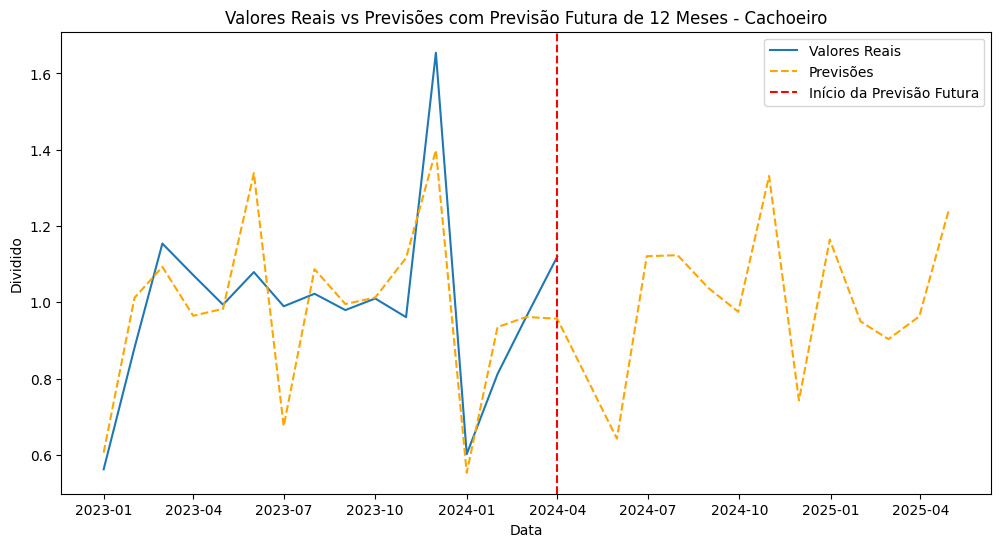

In [80]:
# Calcule as métricas de avaliação
mae = mean_absolute_error(test_y, forecast_test_best)
rmse = np.sqrt(mean_squared_error(test_y, forecast_test_best))
mape = np.mean(np.abs((test_y - forecast_test_best) / test_y)) * 100
r2 = r2_score(test_y, forecast_test_best)

# Exiba as métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.2f}")

# Plotando os valores reais, as previsões e a previsão futura
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Valores Reais')
plt.plot(all_dates_best, all_forecast_best, label='Previsões', linestyle='--', color='orange')
plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
plt.xlabel('Data')
plt.ylabel('Dividido')
plt.title(f'Valores Reais vs Previsões com Previsão Futura de 12 Meses - Geral')
plt.legend()
plt.show()